In [4]:
import sys
import os

# Add the top-level directory to the Python path
top_level_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(top_level_dir)


In [5]:

from MultiAgent import Agent, World
from Simulation import Optimizer, run_agent, animate
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'SantaFe'

In [2]:
def score(agent:Agent, weights, T):
    return weights[0] * agent.food / 89 + weights[1] * (T / agent.num_actions)


In [ ]:
T = 200
score_weights = [0.7, 0.3]
sim = Optimizer(N=80, k=20, r=10, T=T, m=3, p_prune=0.4, p_mutate_old=0.0, 
                p_mutate_new=0.8, score_func=lambda agent: score(agent, score_weights, T))

In [4]:
scores_over_time, food_over_time = sim.run(num_generations=120)
best_agent = sim.best_agent

100%|██████████| 120/120 [03:04<00:00,  1.54s/it]


In [5]:
print(score(best_agent, score_weights, T))
print(best_agent.food)

0.7932584269662921
43


Text(0.5, 1.0, 'Best Food Over Time')

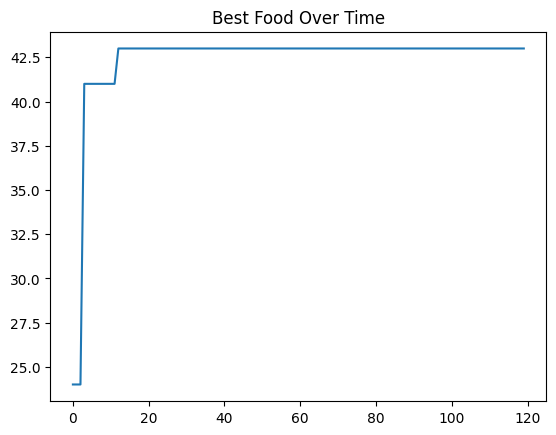

In [6]:
%matplotlib inline
plt.plot(food_over_time)
plt.title('Best Food Over Time')

Text(0.5, 1.0, 'Scores Over Time')

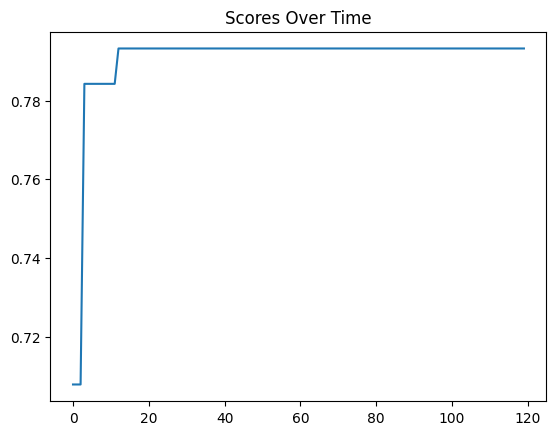

In [7]:
%matplotlib inline
plt.plot(scores_over_time)
plt.title('Scores Over Time')

In [8]:
%matplotlib tk
frames = run_agent(best_agent, world=sim.world, T=T)
animation = animate(frames, pause=50)